In [1]:
!pip install openpyxl
!pip install plotly

In [2]:
# Linear Algebra
import numpy as np

# Data Processing
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [3]:
url = 'https://github.com/Virementz/RinggitPlus/raw/main/RP%20%20Assessment%20Part%202%20-%20Analytics.xlsx'

In [4]:
df = pd.concat(pd.read_excel(url, sheet_name=None), ignore_index=True)

In [5]:
xls = pd.ExcelFile(url)

In [6]:
df = pd.read_excel(url)

In [7]:
xls.sheet_names

['Question', 'CRCD Application Dataset Sample']

In [8]:
sheet1 = xls.parse(0)
sheet2 = xls.parse(1)

In [9]:
print(sheet2)

      lead_id issuerCD application_cohort approval_month  \
0           1   Bank C            2021-06        2021-07   
1           2   Bank L            2021-06            NaN   
2           3   Bank G            2021-06            NaN   
3           4   Bank D            2021-06            NaN   
4           5   Bank C            2021-06            NaN   
...       ...      ...                ...            ...   
8883     8884   Bank D            2021-06            NaN   
8884     8885   Bank C            2021-06        2021-07   
8885     8886   Bank J            2021-06            NaN   
8886     8887   Bank K            2021-06            NaN   
8887     8888   Bank G            2021-06            NaN   

                      channel culture income_bin riskgrade_bin  
0                     Digital  Others    RM2k-3k           med  
1                     Digital  Others     RM10k+           low  
2                     Digital       C     RM10k+          high  
3     Organic/Direc

# Data Reading, Understanding & Cleaning

In [10]:
df = pd.read_excel(url, sheet_name='CRCD Application Dataset Sample')

In [11]:
df.info

<bound method DataFrame.info of       lead_id issuerCD application_cohort approval_month  \
0           1   Bank C            2021-06        2021-07   
1           2   Bank L            2021-06            NaN   
2           3   Bank G            2021-06            NaN   
3           4   Bank D            2021-06            NaN   
4           5   Bank C            2021-06            NaN   
...       ...      ...                ...            ...   
8883     8884   Bank D            2021-06            NaN   
8884     8885   Bank C            2021-06        2021-07   
8885     8886   Bank J            2021-06            NaN   
8886     8887   Bank K            2021-06            NaN   
8887     8888   Bank G            2021-06            NaN   

                      channel culture income_bin riskgrade_bin  
0                     Digital  Others    RM2k-3k           med  
1                     Digital  Others     RM10k+           low  
2                     Digital       C     RM10k+    

In [12]:
df.head()

,lead_id,issuerCD,application_cohort,approval_month,channel,culture,income_bin,riskgrade_bin
0,1,Bank C,2021-06,2021-07,Digital,Others,RM2k-3k,med
1,2,Bank L,2021-06,NaN,Digital,Others,RM10k+,low
2,3,Bank G,2021-06,NaN,Digital,C,RM10k+,high
3,4,Bank D,2021-06,NaN,Organic/Direct/Referral,C,RM5k-8k,high
4,5,Bank C,2021-06,NaN,Digital,C,RM3k-5k,high


In [13]:
df.columns

Index(['lead_id', 'issuerCD', 'application_cohort', 'approval_month',
       'channel', 'culture', 'income_bin', 'riskgrade_bin'],
      dtype='object')

In [14]:
df.shape

(8888, 8)

In [15]:
df = df.drop_duplicates()
df.shape

(8888, 8)

it seems like there is no duplicate data on the database

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8888 entries, 0 to 8887
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             8888 non-null   int64 
 1   issuerCD            8888 non-null   object
 2   application_cohort  8888 non-null   object
 3   approval_month      1051 non-null   object
 4   channel             8888 non-null   object
 5   culture             8888 non-null   object
 6   income_bin          8888 non-null   object
 7   riskgrade_bin       8888 non-null   object
dtypes: int64(1), object(7)
memory usage: 624.9+ KB


In [17]:
df.isna().sum()

lead_id                  0
issuerCD                 0
application_cohort       0
approval_month        7837
channel                  0
culture                  0
income_bin               0
riskgrade_bin            0
dtype: int64

most company has non-null values except for approval_month feature which has some null value. as per described in dataset given, null value for approval_month means that it is still pending or not approved

hence, we need to replace null value in approval_month 

In [18]:
df['approval_month'].fillna(value='still pending/not approved yet',inplace=True)

In [19]:
df.head

<bound method NDFrame.head of       lead_id issuerCD application_cohort                  approval_month  \
0           1   Bank C            2021-06                         2021-07   
1           2   Bank L            2021-06  still pending/not approved yet   
2           3   Bank G            2021-06  still pending/not approved yet   
3           4   Bank D            2021-06  still pending/not approved yet   
4           5   Bank C            2021-06  still pending/not approved yet   
...       ...      ...                ...                             ...   
8883     8884   Bank D            2021-06  still pending/not approved yet   
8884     8885   Bank C            2021-06                         2021-07   
8885     8886   Bank J            2021-06  still pending/not approved yet   
8886     8887   Bank K            2021-06  still pending/not approved yet   
8887     8888   Bank G            2021-06  still pending/not approved yet   

                      channel culture income_

In [20]:
df.approval_month

0                              2021-07
1       still pending/not approved yet
2       still pending/not approved yet
3       still pending/not approved yet
4       still pending/not approved yet
                     ...              
8883    still pending/not approved yet
8884                           2021-07
8885    still pending/not approved yet
8886    still pending/not approved yet
8887    still pending/not approved yet
Name: approval_month, Length: 8888, dtype: object

In [21]:
df.application_cohort

0       2021-06
1       2021-06
2       2021-06
3       2021-06
4       2021-06
         ...   
8883    2021-06
8884    2021-06
8885    2021-06
8886    2021-06
8887    2021-06
Name: application_cohort, Length: 8888, dtype: object

In [22]:
df.isna().sum()

lead_id               0
issuerCD              0
application_cohort    0
approval_month        0
channel               0
culture               0
income_bin            0
riskgrade_bin         0
dtype: int64

now there is no null value anynmore. Next step is to look for unique values in each feature by looping through features

In [23]:
for i in df.columns:
    print(i ,'has', df[i].unique(),'\n')

lead_id has [   1    2    3 ... 8886 8887 8888] 

issuerCD has ['Bank C' 'Bank L' 'Bank G' 'Bank D' 'Bank B' 'Bank K' 'Bank J' 'Bank E'
 'Bank I'] 

application_cohort has ['2021-06'] 

approval_month has ['2021-07' 'still pending/not approved yet' '2021-06' '2021-10' '2021-09'
 '2021-08'] 

channel has ['Digital' 'Organic/Direct/Referral' 'eDM&SMS' 'Affiliates' 'RPTM'] 

culture has ['Others' 'C' 'M' 'I'] 

income_bin has ['RM2k-3k' 'RM10k+' 'RM5k-8k' 'RM3k-5k' 'RM8k-10k' 'RM0k-2k'] 

riskgrade_bin has ['med' 'low' 'high'] 



# Data Analysis: Descriptive Analytics & Insight

In [24]:
px.pie(data_frame=df.channel.value_counts(),
       names=df.channel.value_counts().index,
       values=df.channel.value_counts(),
       title='Sources of Lead (proportion)')

In [43]:
df.channel.value_counts()

Digital                    5889
RPTM                       1237
eDM&SMS                     833
Organic/Direct/Referral     633
Affiliates                  296
Name: channel, dtype: int64

Text(0.5, 1.0, 'Application Income Range')

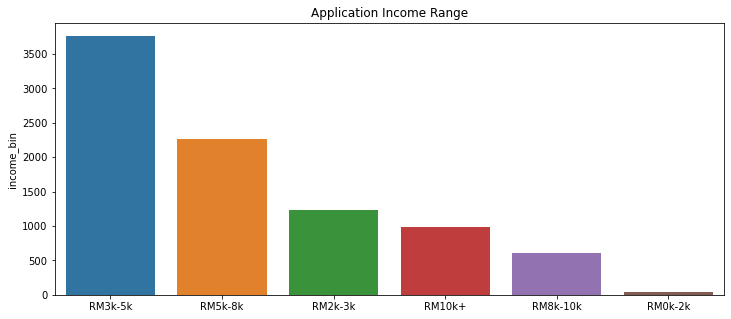

In [26]:
plt.figure(figsize=(12,5))
x= sns.barplot(x=df.income_bin.value_counts().index,y=df.income_bin.value_counts())
plt.title('Application Income Range')

In [42]:
df.income_bin.value_counts()

RM3k-5k     3764
RM5k-8k     2265
RM2k-3k     1228
RM10k+       987
RM8k-10k     607
RM0k-2k       37
Name: income_bin, dtype: int64

Text(0.5, 1.0, 'Issuer/Facility Provider/Banks')

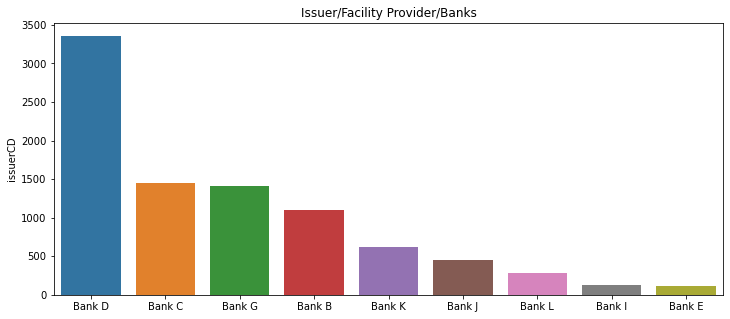

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(x=df.issuerCD.value_counts().index,y=df.issuerCD.value_counts())
plt.title('Issuer/Facility Provider/Banks')

In [41]:
df.issuerCD.value_counts()

Bank D    3357
Bank C    1446
Bank G    1409
Bank B    1098
Bank K     616
Bank J     447
Bank L     283
Bank I     121
Bank E     111
Name: issuerCD, dtype: int64

In [28]:
px.pie(data_frame=df.riskgrade_bin.value_counts(),
       names=df.riskgrade_bin.value_counts().index,
       values=df.riskgrade_bin.value_counts(),
       title='RiskGrade by Internal Scoring in estimating Application Risk Band (high riskgrade is estimated to represent a good quality of CRCD application)')

In [40]:
df.riskgrade_bin.value_counts()

high    5664
med     1978
low     1246
Name: riskgrade_bin, dtype: int64

In [34]:
px.pie(data_frame=df.culture.value_counts(),
       names=df.culture.value_counts().index,
       values=df.culture.value_counts(),
       title='Race Demographics')

In [36]:
df.culture.value_counts()

C         3724
Others    2378
M         2281
I          505
Name: culture, dtype: int64

Text(0.5, 1.0, 'Approval Months Tag (empty means still pending OR not approved)')

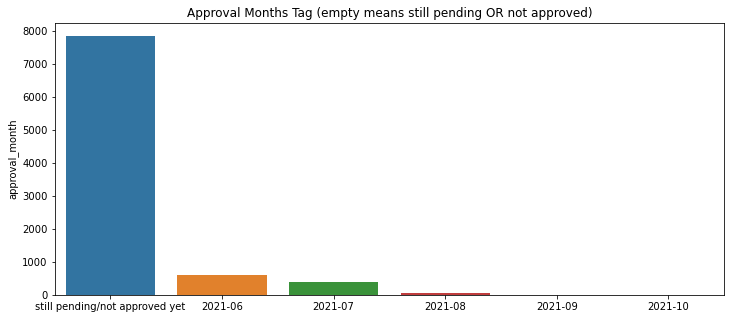

In [30]:
plt.figure(figsize=(12,5))
sns.barplot(x=df.approval_month.value_counts().index,y=df.approval_month.value_counts())
plt.title('Approval Months Tag (empty means still pending OR not approved)')

In [39]:
df.approval_month.value_counts()

still pending/not approved yet    7837
2021-06                            613
2021-07                            384
2021-08                             49
2021-09                              3
2021-10                              2
Name: approval_month, dtype: int64

# Open Analysis & Insight

1. Most of CRCD Application are through Digital Channel which made up of 66.3% (5889) of total application followed by RPTM (1237), eDM&SMS (833), Organic/Direct/Referral (633) & Affiliates (296)
2. Looking at the data provided, majority of CRCD Application income range was between Rm3k-5K which mades up of 3764 application
3. Bank D issue the most CRCD application which totals up to 3357 application compare to any other bank which issue only in the range of 1000-1400 application
4. Looking from the pie chart of riskgrade, 63.7% (5664 applicant) of CRCD Application consist of high riskgrade applicant. Higher riskgrade here attriibutes to good quality of application
5. Looking at the race demographic, most of CRCD Application are Chinese which mades up of majority 41.9% followed by otheer race at 2nd place with 26.8% (2378), Malay at 2281 (25.7%) and with India as minority at 5.68% (505 applicant)
6. Looking at the rate of approval, we can see most of CRCD application were approved on 2021-06 which peak at 613 approval. However, looking at the overall picture, we can see majority of the application/cases were still pending or not approved which made up of 7837 application. 